- 텐서 : 다차원 넘파이 배열
  - 데이터를 위한 컨테이너
  - 거의 숫자를 위해 사용
  - 텐서에서는 차원을 축이라고도 함 Dimension -- Axis )
  - 스칼라 ( 0D 텐서 )
    - 하나의 숫자만 담고 있는 텐서를 스칼라라고 함 ( ndim = 0 은 축이 0개, = 축을 랭크라고도 함 )
    - array(12)
  - 벡터 ( 1D 텐서 )
    - 숫자의 배열을 벡터라고 함. 축을 1개 가짐.
    - array([1, 2, 3, 4, 5]) --> 5D 벡터이면서 1D 텐서, 기술적으로 정확하게 말하려면 랭크5 1D 텐서가 됨
  - 행렬 ( matrix, 2D 텐서 )
    - 행과 열이 존재
    - array([[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 1],
             [2, 4, 6, 7, 9]])
  - 3D 텐서와 고차원 텐서
    - 행렬이 연속된 새로운 배열이 곧 3D 텐서가 됨
    - 연속된 3D 텐서를 배열로 묶으면 4D 텐서가 됨
    - 보통 딥러닝에서는 4D 텐서까지 취급하나, 동영상 데이터를 다루는 경우 5D 텐서까지 다룸

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

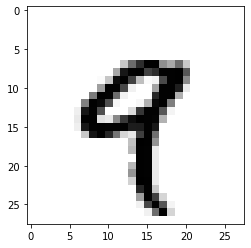

In [3]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


- 배치 데이터 :
  - 일반적으로 딥러닝에 사용하는 모든 데이터 텐서의 첫 번째 축은 샘플 축이다. ( 샘플 차원 )
  - 딥러닝은 한 번에 전체 데이터셋을 처리하지 않고, 데이터를 작은 배치로 나눠 처리

In [8]:
batch = train_images[:128]
batch = train_images[128:256]

- 배치 데이터를 다룰 때 첫 번째 축 ( 0번 축 )을 배치 축 또는 배치 차원이라고 함.

- 벡터 데이터 : (samples, features) 크기의 2D 텐서
- 시계열 데이터 or 시퀀스 데이터 : (samples, timesteps, features) 크기의 3D 텐서
- 이미지 : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
- 동영상 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

- 벡터 데이터
  - 대부분의 경우 해당
  - 첫 번째 축은 샘플 축, 두 번째 축은 특성 축
  - 나이, 우편 번호, 소득으로 구성된 인구 데이터의 경우
    - 각 사람은 3개의 값을 가진 벡터로 구성되고, 10만 명이 포함되면 전체 데이터셋은 (100000, 3) 크기의 텐서에 저장될 수 있다.
    
- 시계열 데이터 ( or Sequence data )
  - 관례적으로 시간 축은 항상 두 번째 축(인덱스가 1인 축)
  - 주식 가격 데이터의 경우
    - 1분마다 현재 주식 가격, 지난 1분 동안의 최고,최저가를 저장
    - 하루 동안 거래 시간이 390분이라고 하면, 텐서의 크기는 (390, 3)
    - 이를 250일치의 데이터로 저장하면 (250, 390, 3)
    
- 이미지 데이터
  - 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어짐
  - 흑백 이미지는 컬러 채널이 1개 뿐이므로 2D로 저장될 수 있지만, ( 컬러 채널을 생략한 높이와 너비로만 이루어진 텐서 ) 관례상 이미지 텐서는 항상 3D로 저장됨
  - 256 x 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1) 크기의 텐서에 저장될 수 있음.
  - 이미지 텐서의 크기를 지정하는 방식은 두 가지
    - 텐서플로우에서 사용하는 Channel-last 방식 : (samples, height, width, color_depth) 컬러 채널을 축의 제일 마지막 순서로 놓음
    - 씨아노에서 사용하는 Channel-first 방식 : (samples, color-depth, height, width) 컬러 채널을 샘플 축 뒤에 놓음
    - 케라스는 두 형식을 모두 지원

- 비디오 데이터
  - 하나의 비디오는 프레임의 연속이고, 각 프레임은 하나의 컬러 이미지임
  - 이미지 데이터에서 축에 샘플 다음으로 frame을 추가하면 됨

심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서 연산으로나타낼 수 있음. 텐서 덧셈이나 텐서 곱셈 등.

In [14]:
from keras import models
from keras import layers

models = models.Sequential()
models.add(layers.Dense(512, activation='relu'))

output = relu(dot(w, input) + b)

relu 함수와 덧셈은 원소별 연산.

연산은 텐서에 있는 각 원소에 독립적으로 적용됨.

즉, 병렬 연산이 가능하다는 것

relu 연산 구현처럼 for 반복문을 사용하여 함수를 작성해보는 예제

In [15]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [17]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

위와 같은 원리로 텐서 데이터 원소별 연산이 가능
넘파이는 시스템에 설치된 BLAS(Basic Linear Algebra Subprogram) 구현에 복잡한 일들을 위임한다. BLAS는 고도로 병렬화되고 효율적인 저수준의 텐서 조작 루틴이며, 전형적으로 Fortran이나 C 언어로 구현되어 있음.

- 브로드캐스팅
  - 텐서끼리의 연산에서 크기가 다른 텐서가 더해질 때?
  - 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅된다.
    1. 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가됨
    2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨

In [18]:
# 구현 입장에서는 새로운 텐서가 만들어지면 매우 비효율적이므로 새로 만들지 않음.
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [24]:
# 크기가 다른 두 텐서에 브로드캐스팅으로 원소별 연산을 적용하는 예
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [28]:
print('x + y 연산의 결과 :', z.shape)

x + y 연산의 결과 : (64, 3, 32, 10)


In [32]:
del x, y

In [ ]:
# 텐서 점곱 ( tensor product )

import numpy as np
z = np.dot(x, y)
z = z * y

# 딥러닝의 기하학적 해석
신경망은 전체적으로 텐서 연산의 연결이고, 모든 텐서 연산은 입력 데이터의 기하학적 변환이다. 빨간색과 파란색 종이 각 1장씩이 뭉쳐진 작은 공을 펼쳐 깔끔하게 분리되는 변환을 찾는 것이 신경망이 할 일.

기초적인 연산을 길게 연결하여 복잡한 기하학적 변환을 조금씩 분해하는 것이 바로 사람이 종이 공을 펼치기 위해 세우는 전략과 흡사하므로 이런 작업에 효율적으로 접근이 가능